#### Right Threshold values using ROC curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for roc curve and auc curve
from sklearn.datasets import make_classification

In [5]:
from sklearn.model_selection import train_test_split
#will take 2000 rows and 20 default columns, number of classes output  class is 2 (0,1), 
#weights =[1,1] for balanced datasets
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
X.shape

(2000, 20)

In [8]:
y.shape

(2000,)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### Random Forest

In [11]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9798388888888889


##### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


##### KNNClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


##### AdaBoost Classifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


No we will focus on selecting the best threshold for maximum accuracy

In [15]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1) # axis =1, meaning getting mean of each row
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9846111111111112


In [16]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.55,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.04,0.001147,0.441720,0.2


In [17]:
final_prediction

0      0.885262
1      0.115823
2      0.821283
3      0.742853
4      0.554947
         ...   
595    0.121340
596    0.112845
597    0.879197
598    0.170717
599    0.834857
Length: 600, dtype: float64

In [18]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91322159, 0.91322159, 0.9084413 , 0.90827475, 0.81415023,
       0.81412833, 0.7955287 , 0.7930558 , 0.78537052, 0.78071156,
       0.76547605, 0.76287124, 0.72958108, 0.72887362, 0.70763034,
       0.70143711, 0.65537883, 0.65493537, 0.59656376, 0.58175354,
       0.57649047, 0.57236186, 0.57058969, 0.57050386, 0.55494674,
       0.54889283, 0.52845371, 0.52377948, 0.46950602, 0.46866892,
       0.45240225, 0.44794916, 0.4346034 , 0.37057343, 0.35586612,
       0.24619003, 0.24396893, 0.23904122, 0.23890421, 0.19666474,
       0.19598417, 0.11790921, 0.1178351 , 0.10548439])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.447949,0.961667
32,0.434603,0.960000
30,0.452402,0.960000
29,0.468669,0.960000
28,0.469506,0.958333


In [20]:
accuracy_ls

,thresholds,accuracy
31,0.447949,0.961667
32,0.434603,0.960000
30,0.452402,0.960000
29,0.468669,0.960000
28,0.469506,0.958333
27,0.523779,0.958333
26,0.528454,0.958333
25,0.548893,0.956667
24,0.554947,0.955000
21,0.572362,0.953333


In [21]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

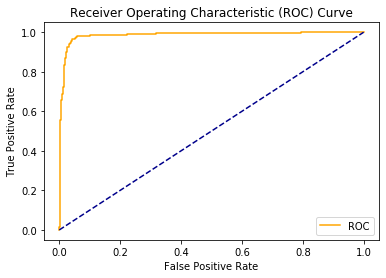

In [22]:
plot_roc_curve(fpr,tpr)